# **ARCENE Cancer Classification**

**Dataset:** ARCENE dataset available at https://archive.ics.uci.edu/ml/datasets/Arcene

**Code:** Chapter 5 SVM from `Hands-On Machine Learning with Scikit-Learn and TensorFlow` book (Aurélien Géron)

In [1]:
# Common imports
import numpy as np
import os

import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Get the data

Classify the healthy vs. cancer patients.

### Dataset as described on UCI:
ARCENE was obtained by merging three mass-spectrometry datasets to obtain enough training and test data for a benchmark. The original features indicate the abundance of proteins in human sera having a given mass value. Based on those features one must separate cancer patients from healthy patients. We added a number of distractor feature called 'probes' having no predictive power. The order of the features and patterns were randomized.

<table>
    <thead>
        <tr>
            <th colspan="4">ARCENE Dataset</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>ARCENE</td>
            <td>Positive ex</td>
            <td>Negative ex</td>
            <td>Total</td>
        </tr>
         <tr>
            <td>Training set</td>
            <td>44</td>
            <td>56</td>
            <td>100</td>
        </tr>
        <tr>
            <td>Validation set</td>
            <td>44</td>
            <td>56</td>
            <td>100</td>
        </tr>
         <tr>
            <td>Test set</td>
            <td>310</td>
            <td>390</td>
            <td>700</td>
        </tr>
         <tr>
            <td>All</td>
            <td>398</td>
            <td>502</td>
            <td>900</td>
        </tr>
    </tbody>
</table>

Number of variables/features/attributes: Real: 7000    Probes: 3000   Total: 10000

This dataset is one of five datasets used in the NIPS 2003 feature selection challenge.

In [2]:
ARCENE_PATH = "dataset"

def load_arcene_data(arcene_path=ARCENE_PATH, data_file="data.csv"):
    csv_path = os.path.join(arcene_path, data_file)
    return pd.read_csv(csv_path, sep='\s+', header=None)

In [3]:
X_train = load_arcene_data(data_file="arcene_train.data")
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,71,0,95,0,538,404,20,0,0,...,255,570,86,0,36,0,80,0,0,524
1,0,41,82,165,60,554,379,0,71,0,...,213,605,69,7,473,0,57,0,284,423
2,0,0,1,40,0,451,402,0,0,0,...,235,593,28,0,24,0,90,0,34,508
3,0,56,44,275,14,511,470,0,0,0,...,91,600,0,26,86,0,102,0,0,469
4,105,0,141,348,0,268,329,0,0,1,...,813,0,0,0,0,190,301,0,0,354


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 10000 entries, 0 to 9999
dtypes: int64(10000)
memory usage: 7.6 MB


In [5]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,37.060000,35.330000,56.50000,329.860000,17.110000,412.090000,232.330000,6.510000,48.170000,63.690000,...,363.780000,396.480000,45.920000,18.210000,106.070000,165.350000,197.650000,0.360000,88.530000,365.750000
std,49.763647,37.690943,68.64011,164.264508,26.348057,108.375152,186.106142,13.149102,57.624009,91.626349,...,262.439741,233.176462,47.886161,23.914112,141.747054,145.380752,113.122118,2.110675,109.698619,106.055386
min,0.000000,0.000000,0.00000,27.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,...,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,213.750000,0.000000,314.250000,0.000000,0.000000,0.000000,0.000000,...,192.500000,309.000000,0.000000,0.000000,0.000000,0.000000,94.500000,0.000000,0.000000,314.500000
50%,15.000000,25.000000,19.50000,333.500000,0.000000,441.000000,266.000000,0.000000,30.000000,0.500000,...,250.000000,468.500000,34.500000,2.500000,48.500000,186.000000,167.000000,0.000000,38.500000,364.500000
75%,57.500000,59.750000,107.25000,443.000000,29.000000,501.250000,422.750000,4.500000,79.250000,125.000000,...,482.000000,579.250000,75.250000,34.250000,140.000000,276.500000,295.750000,0.000000,165.500000,446.500000
max,188.000000,218.000000,236.00000,677.000000,99.000000,583.000000,493.000000,55.000000,202.000000,391.000000,...,863.000000,654.000000,195.000000,83.000000,656.000000,485.000000,422.000000,18.000000,392.000000,533.000000


In [6]:
y_train = load_arcene_data(data_file="arcene_train.labels")
y_train.head()

,0
0,1
1,-1
2,1
3,1
4,-1


In [7]:
y_train[0].value_counts()

-1    56
 1    44
Name: 0, dtype: int64

In [8]:
y_train.rename( columns={0:'label'}, inplace=True )

## Data visualization

Join train attributes and labels

In [9]:
X_train_with_labels = pd.concat([X_train, y_train], axis=1, sort=False)

In [10]:
X_train_with_labels.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,0,71,0,95,0,538,404,20,0,0,...,570,86,0,36,0,80,0,0,524,1
1,0,41,82,165,60,554,379,0,71,0,...,605,69,7,473,0,57,0,284,423,-1
2,0,0,1,40,0,451,402,0,0,0,...,593,28,0,24,0,90,0,34,508,1
3,0,56,44,275,14,511,470,0,0,0,...,600,0,26,86,0,102,0,0,469,1
4,105,0,141,348,0,268,329,0,0,1,...,0,0,0,0,190,301,0,0,354,-1


In [11]:
corr_matrix = X_train_with_labels.corr()

In [12]:
corr_matrix["label"].sort_values(ascending=False)

label    1.000000
2643     0.375672
9278     0.371418
7733     0.370503
6480     0.368229
           ...   
9165          NaN
9356          NaN
9538          NaN
9895          NaN
9913          NaN
Name: label, Length: 10001, dtype: float64

In [13]:
X_train_no_cancer = pd.DataFrame(X_train, columns=X_train.columns, index=X_train.index[(X_train_with_labels["label"] == -1)])

In [14]:
X_train_cancer = pd.DataFrame(X_train, columns=X_train.columns, index=X_train.index[(X_train_with_labels["label"] == 1)])

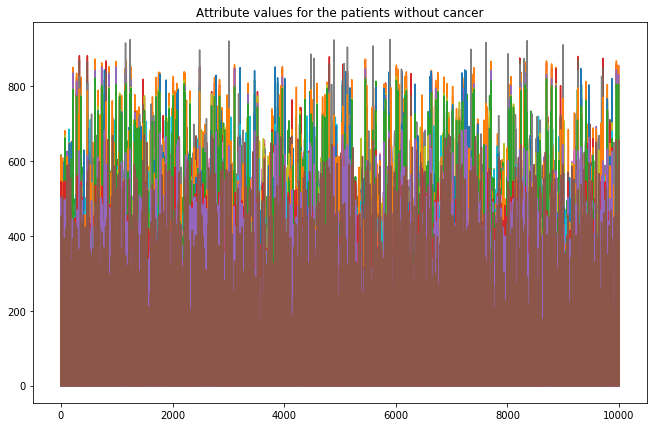

In [15]:
X_train_no_cancer.T.plot.line(legend=False,  figsize=(11,7), title="Attribute values for the patients without cancer")

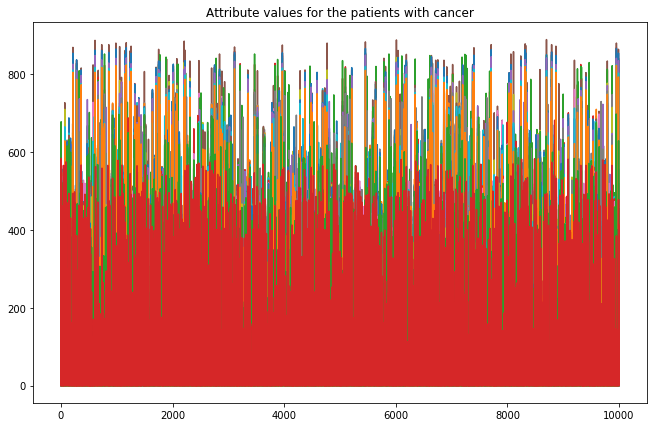

In [16]:
X_train_cancer.T.plot.line(legend=False,  figsize=(11,7), title="Attribute values for the patients with cancer")

### Read the valid dataset

In [17]:
X_valid = load_arcene_data(data_file="arcene_valid.data")
X_valid.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,156,138,2,635,444,0,1,0,...,88,692,42,0,50,67,87,0,0,465
1,0,7,0,7,0,251,0,0,22,222,...,698,673,0,0,18,201,317,0,34,199
2,0,32,0,470,53,493,0,0,140,147,...,267,461,20,34,165,225,53,0,47,219
3,0,77,0,202,0,432,472,0,60,0,...,181,555,13,0,488,0,71,0,177,487
4,0,34,102,522,2,474,473,0,39,0,...,114,630,0,29,192,0,74,0,5,416


In [18]:
y_valid = load_arcene_data(data_file="arcene_valid.labels")

# Data preparation

Shuffle the training data:

In [19]:
np.random.seed(42)

shuffle_index = np.random.permutation(X_train.shape[0])
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

Expecting no incomplete rows, and **no imputation** later in the pipeline:

In [20]:
sample_incomplete_rows = X_train[X_train.isnull().any(axis=1)].head()
sample_incomplete_rows

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_train_prepared = scaler_pipeline.fit_transform(X_train)

# Binary Classification

**Train a `Stochastic Gradient Descent (SGD) Classifier`:**

In [22]:
y_train = y_train.values.ravel()

In [23]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
y_valid_predict = sgd_clf.predict(X_valid)

**Performance of the model**:

In [25]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

confusion_matrix(y_valid, y_valid_predict)

array([[12, 44],
       [ 0, 44]], dtype=int64)

In [26]:
def performance_scores(y, y_predict):
    print("Precision score:\t", precision_score(y, y_predict))
    print("Recall score:\t\t", recall_score(y, y_predict))   
    print("F1 score:\t\t", f1_score(y, y_predict))   
    return

In [27]:
performance_scores(y_valid, y_valid_predict)

Precision score:	 0.5
Recall score:		 1.0
F1 score:		 0.6666666666666666


**Recall vs. Precision**

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_valid, y_valid_predict)

In [29]:
def show_recall_vs_precision_curve(recalls, precisions, label=None):
    plt.plot(recalls, precisions, label=label)
    plt.axis([0, 1, 0, 1])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()
    return

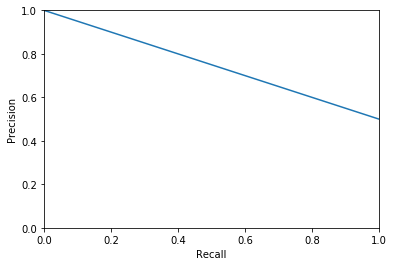

In [30]:
show_recall_vs_precision_curve(recalls, precisions)

In [31]:
def show_threshold_vs_recall_precision_curve(thresholds, recalls, precisions):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall/Sensitivity")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.ylim([0, 1])
    plt.show()
    return

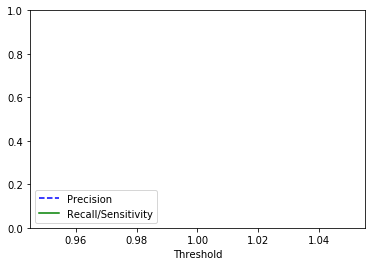

In [32]:
show_threshold_vs_recall_precision_curve(thresholds, recalls, precisions)

**ROC Curve**:

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_valid, y_valid_predict)

In [34]:
def show_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=None)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("FPR / 1 - TNR / 1 - specificity")
    plt.ylabel("TPR / sensitivity")
    plt.show()
    return

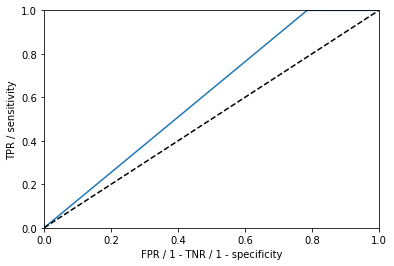

In [35]:
show_roc_curve(fpr, tpr)

In [36]:
from sklearn.metrics import auc

roc_auc = auc(fpr, tpr)
roc_auc

0.6071428571428572

**Try a `Random Forest Classifier`:**

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_prepared, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [38]:
y_valid_predict = forest_clf.predict(X_valid)

In [39]:
confusion_matrix(y_valid, y_valid_predict)

array([[45, 11],
       [35,  9]], dtype=int64)

In [40]:
performance_scores(y_train, y_valid_predict)

Precision score:	 0.65
Recall score:		 0.29545454545454547
F1 score:		 0.40625


The performance of this model is worst!

In [41]:
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_predict)

In [42]:
roc_auc = auc(fpr, tpr)
roc_auc

0.5040584415584416

**Try a `Linear SVC Classifier`:**

In [43]:
from sklearn.svm import LinearSVC

lin_svm_clf = Pipeline((
    ('std_scaler', StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
    ))

lin_svm_clf.fit(X_train_prepared, y_train)
y_valid_predict = lin_svm_clf.predict(X_valid)

In [44]:
confusion_matrix(y_valid, y_valid_predict)

array([[24, 32],
       [ 1, 43]], dtype=int64)

In [45]:
performance_scores(y_train, y_valid_predict)

Precision score:	 0.4
Recall score:		 0.6818181818181818
F1 score:		 0.5042016806722689


In [46]:
precisions, recalls, thresholds = precision_recall_curve(y_valid, y_valid_predict)

In [47]:
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_predict)

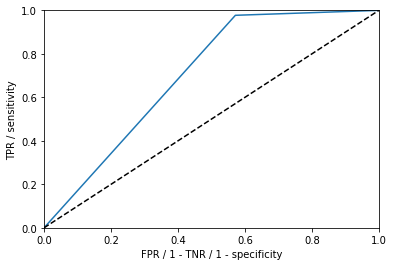

In [48]:
show_roc_curve(fpr, tpr)

In [49]:
roc_auc = auc(fpr, tpr)
roc_auc

0.702922077922078

The performance of this model is a bit worse than `Stochastic Gradient Descent (SGD) Classifier`.

**Try a `Nonlinear SVC Classifier`:**

In [50]:
from sklearn.svm import SVC

poly_svm_clf = Pipeline((
    ('std_scaler', StandardScaler()),
    ("svm_clf", SVC(kernel="poly", C=1, coef0=1, degree=2, random_state=42))
    ))

poly_svm_clf.fit(X_train_prepared, y_train)


Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=2,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=42, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [51]:
y_valid_predict = poly_svm_clf.predict(X_valid)

In [52]:
confusion_matrix(y_valid, y_valid_predict)

array([[41, 15],
       [18, 26]], dtype=int64)

In [53]:
performance_scores(y_valid, y_valid_predict)

Precision score:	 0.6341463414634146
Recall score:		 0.5909090909090909
F1 score:		 0.611764705882353


In [54]:
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_predict)

In [55]:
roc_auc = auc(fpr, tpr)
roc_auc

0.661525974025974

**Optimal hyperparameteres** for `SVC` model through a `Random Search`

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': reciprocal(10, 10000),
        'gamma': expon(scale=1.0),
    }

svm_clf = SVC()
rnd_search = RandomizedSearchCV(svm_clf, param_distributions=param_distribs,
                                n_iter=30, cv=5, scoring='f1',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    9.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=30, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002926331BE08>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002926331B5C8>,
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
        

In [57]:
rnd_search.best_params_

{'C': 8906.20438616168, 'gamma': 0.628789100540856, 'kernel': 'linear'}

In [58]:
y_valid_predict = rnd_search.predict(X_valid)

In [59]:
confusion_matrix(y_valid, y_valid_predict)

array([[36, 20],
       [ 4, 40]], dtype=int64)

In [60]:
performance_scores(y_valid, y_valid_predict)

Precision score:	 0.6666666666666666
Recall score:		 0.9090909090909091
F1 score:		 0.7692307692307692


In [61]:
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_predict)

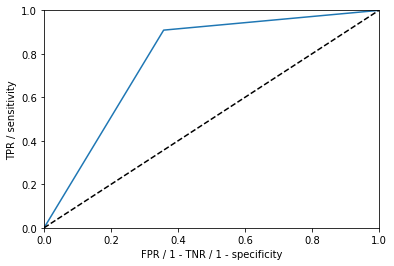

In [62]:
show_roc_curve(fpr, tpr)

In [63]:
roc_auc = auc(fpr, tpr)
roc_auc

0.775974025974026

As 3000 out of 10,000 attributes have no predictive power, use only maximum **7000 top important features**.
Use a regressor to select these important attributes.

In [64]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=7000),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train_prepared, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [65]:
feature_importances = rnd_search.best_estimator_.feature_importances_

In [66]:
features_sorted = sorted(zip(feature_importances, list(X_train)), reverse=True)
print(features_sorted[0], features_sorted[1], features_sorted[2], features_sorted[3], features_sorted[4])

(0.009764291971167202, 6480) (0.008043831213868355, 4191) (0.007451403735105302, 1882) (0.007070771465149308, 5472) (0.006928581609909464, 7563)


In [67]:
features_non_zero = feature_importances.nonzero()

In [68]:
X_train_important = pd.DataFrame(X_train, columns=X_train.columns[features_non_zero], index=X_train.index)
X_train_important

,6,14,26,38,68,73,97,100,130,133,...,9953,9961,9968,9969,9971,9979,9987,9994,9995,9999
83,467,287,0,33,396,141,141,119,103,5,...,311,228,0,0,0,0,57,240,0,458
53,100,297,0,1,556,173,0,68,124,19,...,806,123,0,0,3,0,0,0,221,364
70,426,340,0,24,415,219,306,155,131,4,...,321,236,0,0,0,0,83,129,0,409
45,65,297,0,13,669,120,0,43,117,11,...,816,133,0,0,7,2,31,0,195,292
44,382,217,0,56,456,137,46,39,97,9,...,404,291,0,0,8,0,37,153,0,531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,199,12,23,473,68,0,0,197,28,...,412,166,0,0,0,96,37,3,169,190
71,447,312,0,25,404,151,0,132,112,25,...,296,240,0,0,0,0,10,248,0,400
14,0,497,0,35,378,54,0,109,321,42,...,579,369,0,50,0,39,9,71,409,254
92,397,228,0,72,426,186,7,0,104,31,...,442,310,0,19,62,0,20,262,0,518


**Hyperparameters optimzation**, but use only the **attributes with predictive power**:

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': reciprocal(10, 10000),
        'gamma': expon(scale=1.0),
    }

svm_clf = SVC()
rnd_search = RandomizedSearchCV(svm_clf, param_distributions=param_distribs,
                                n_iter=30, cv=5, scoring='f1',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(X_train_important, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    1.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=30, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000292630C7908>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029262CDB848>,
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
        

In [70]:
rnd_search.best_params_

{'C': 2183.096839052459, 'gamma': 0.9084469696321253, 'kernel': 'poly'}

In [71]:
X_valid_important = pd.DataFrame(X_valid, columns=X_valid.columns[features_non_zero], 
                                 index=X_valid.index)

y_valid_predict = rnd_search.predict(X_valid_important)

In [72]:
confusion_matrix(y_valid, y_valid_predict)

array([[51,  5],
       [12, 32]], dtype=int64)

In [73]:
performance_scores(y_valid, y_valid_predict)

Precision score:	 0.8648648648648649
Recall score:		 0.7272727272727273
F1 score:		 0.7901234567901235


In [74]:
precisions, recalls, thresholds = precision_recall_curve(y_valid, y_valid_predict)

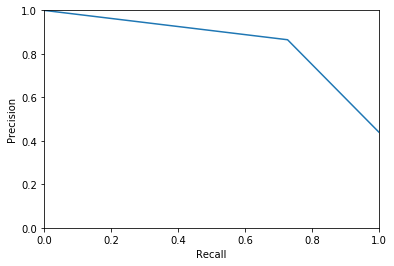

In [75]:
show_recall_vs_precision_curve(recalls, precisions)

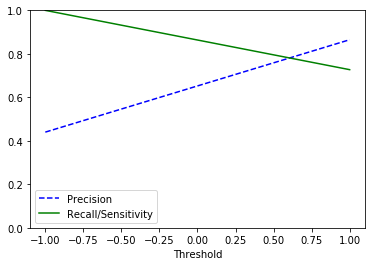

In [76]:
show_threshold_vs_recall_precision_curve(thresholds, recalls, precisions)

In [77]:
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_predict)

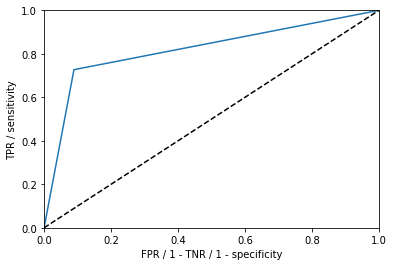

In [78]:
show_roc_curve(fpr, tpr)

In [79]:
roc_auc = auc(fpr, tpr)
roc_auc

0.8189935064935064

Try again `Stochastic Gradient Descent (SGD) Classifier`, but using only the important attributes and find the optimal hyperparameters using a `Random Search`:

In [80]:
# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'loss': ['hinge', 'log', 'huber'],
        'alpha': reciprocal(100, 100000),
    }


sgd_clf = SGDClassifier(random_state=42)

rnd_search = RandomizedSearchCV(sgd_clf, param_distributions=param_distribs,
                                n_iter=30, cv=5, scoring='f1',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(X_train_important, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='deprecated', n_iter=30, n_jobs=4,
                   param_distributions={'alph

In [81]:
rnd_search.best_params_

{'alpha': 3752.0558551242802, 'loss': 'hinge'}

In [82]:
y_valid_predict = rnd_search.predict(X_valid_important)

In [83]:
confusion_matrix(y_valid, y_valid_predict)

array([[41, 15],
       [ 1, 43]], dtype=int64)

In [84]:
performance_scores(y_valid, y_valid_predict)

Precision score:	 0.7413793103448276
Recall score:		 0.9772727272727273
F1 score:		 0.8431372549019609


In [85]:
precisions, recalls, thresholds = precision_recall_curve(y_valid, y_valid_predict)

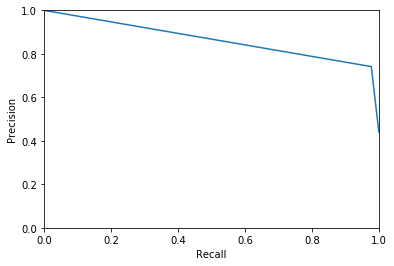

In [86]:
show_recall_vs_precision_curve(recalls, precisions)

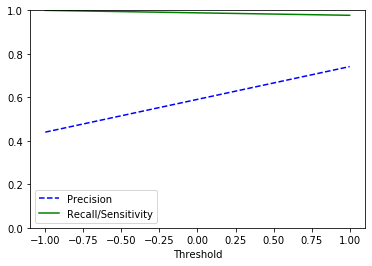

In [87]:
show_threshold_vs_recall_precision_curve(thresholds, recalls, precisions)

In [88]:
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_predict)

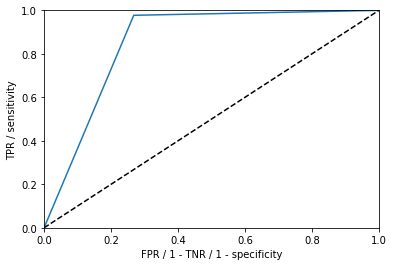

In [89]:
show_roc_curve(fpr, tpr)

In [90]:
roc_auc = auc(fpr, tpr)
roc_auc

0.8547077922077922

<table>
    <thead>
        <tr>
            <th colspan="5">Performance of models</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>Model</b></td>
            <td><b>Precision</b></td>
            <td><b>Recall</b></td>
            <td><b>F1</b></td>
            <td><b>ROC_AUC</b></td>
        </tr>
         <tr>
            <td><b>SGD Classifier</b></td>
            <td>0.5</td>
            <td>1.0</td>
            <td>0.6667</td>
            <td>0.6071</td> 
        </tr>
        <tr>
            <td><b>Random Forest Classifier</b></td>
            <td>0.65</td>
            <td>0.2954</td>
            <td>0.4062</td>
            <td>0.5040</td>
        </tr>
         <tr>
            <td><b>Linear SVC</b></td>
            <td>0.4</td>
            <td>0.6818</td>
            <td>0.5042</td>
            <td>0.7029</td> 
        </tr>
         <tr>
            <td><b>Nonlinear SVC</b></td>
            <td>0.6341</td>
            <td>0.5909</td>
            <td>0.6117</td>
            <td>0.6615</td> 
        </tr>
        <tr>
            <td><b>Optimal SVC</b></td>
            <td>0.6667</td>
            <td>0.9090</td>
            <td>0.7692</td>
            <td>0.7759</td> 
        </tr>
        <tr>
            <td><b>Optimal SVC selected attribs</b></td>
            <td>0.8648</td>
            <td>0.7272</td>
            <td>0.7901</td>
            <td>0.8189</td> 
        </tr>
        <tr>
            <td><b>Optimal SGD Classifier selected attribs</b></td>
            <td>0.7413</td>
            <td>0.9772</td>
            <td><b>0.8431</b></td>
            <td><b>0.8547</b></td> 
        </tr>
    </tbody>
</table>

 **Best model** is the  optimized SGD Classifier with top important features.